In [1]:
import rosbag
import cv2
import numpy as np
from tqdm import tqdm
import bisect
from loguru import logger
import matplotlib.pyplot as plt
from converter import UTMtoLL, LLtoUTM

In [2]:
bag = rosbag.Bag('/mnt/UNENCRYPTED/ruichend/seq/seq3/seq_3.bag')
gps_fixed_msgs = []
for topic, msg, t in bag.read_messages(topics=['/mavros/global_position/raw/fix']):
    gps_fixed_msgs.append(msg)

In [3]:
_, gt_e, gt_n = LLtoUTM(23, 39.9411551, -75.1987216)

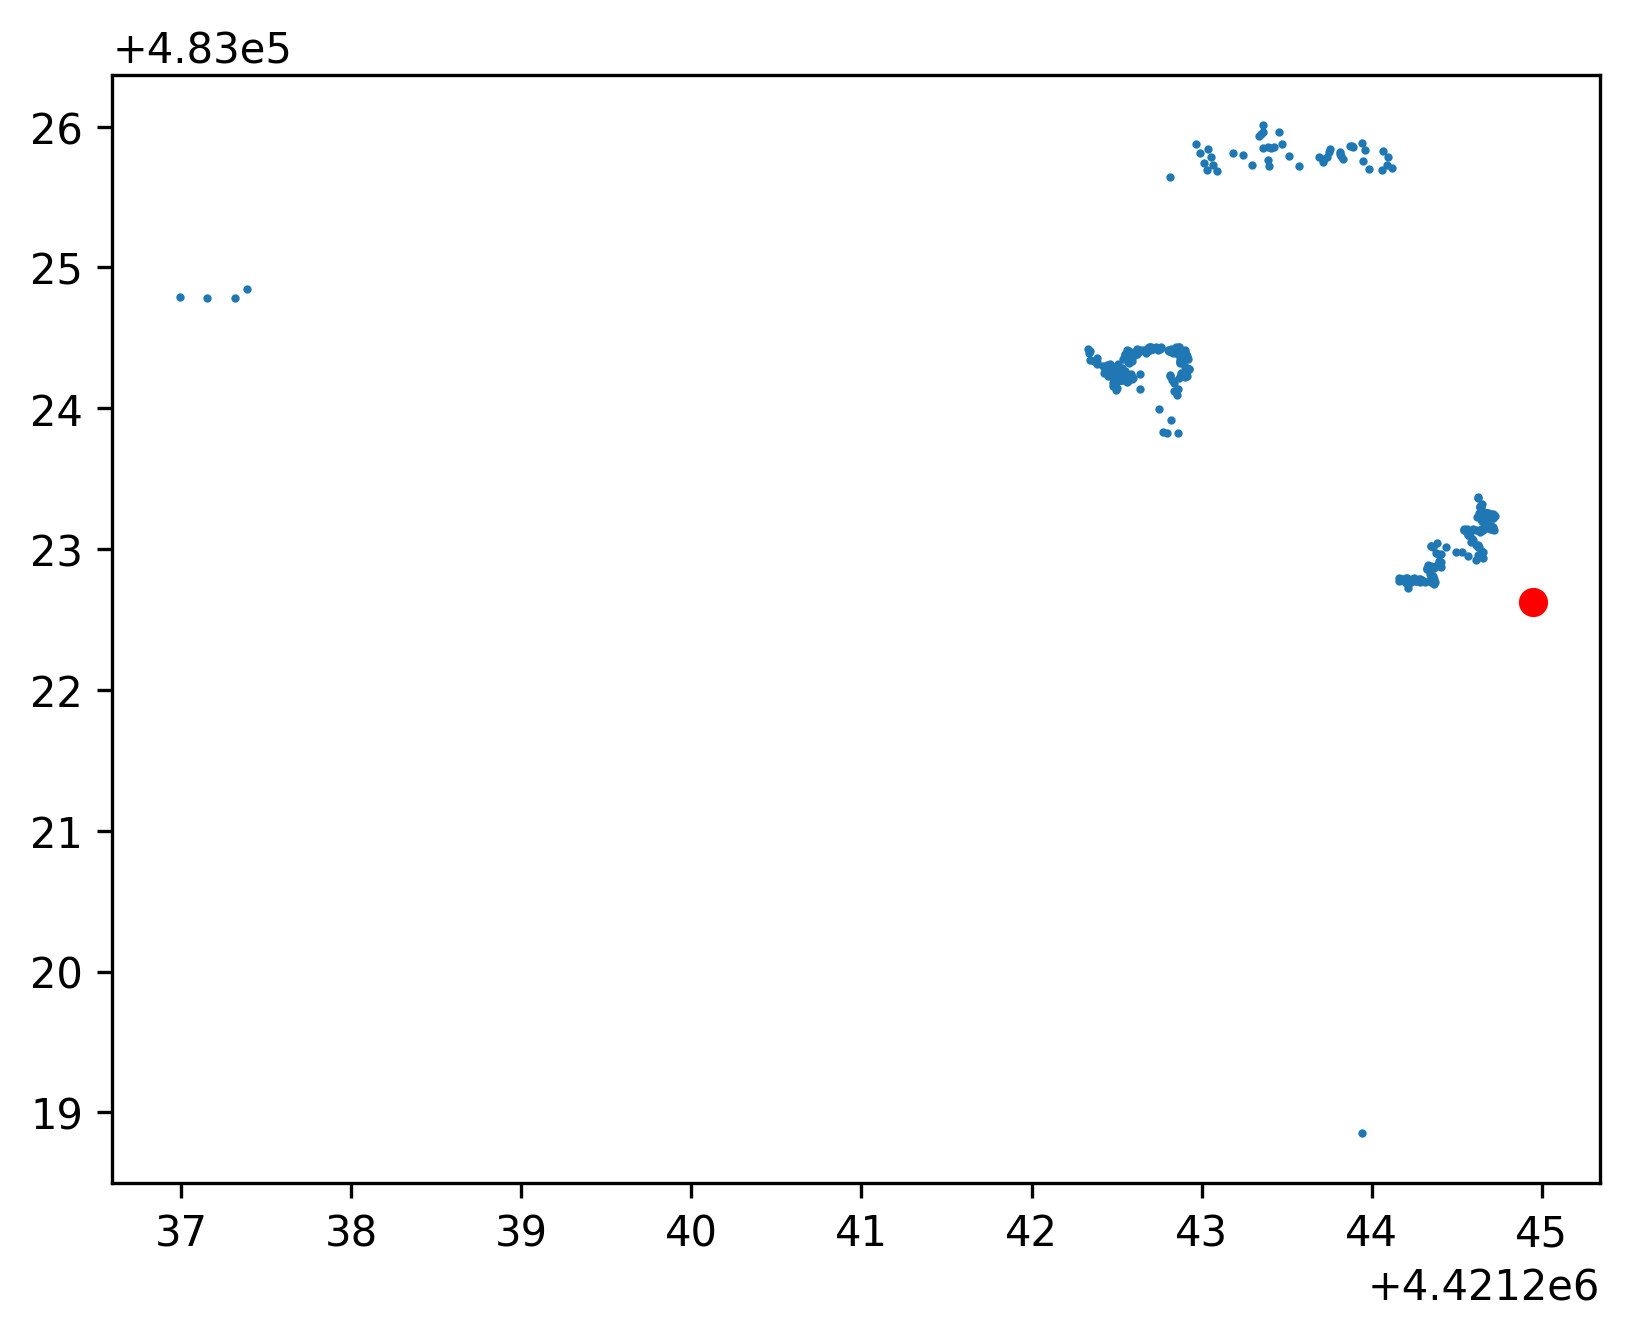

In [21]:
april = np.load('./logs/seq3_april4.npy')
plt.figure(dpi=300)
plt.scatter(april[:, 0], april[:, 1], label='AprilTag', s=1)
plt.scatter(gt_n, gt_e, label='Ground Truth', color='red')

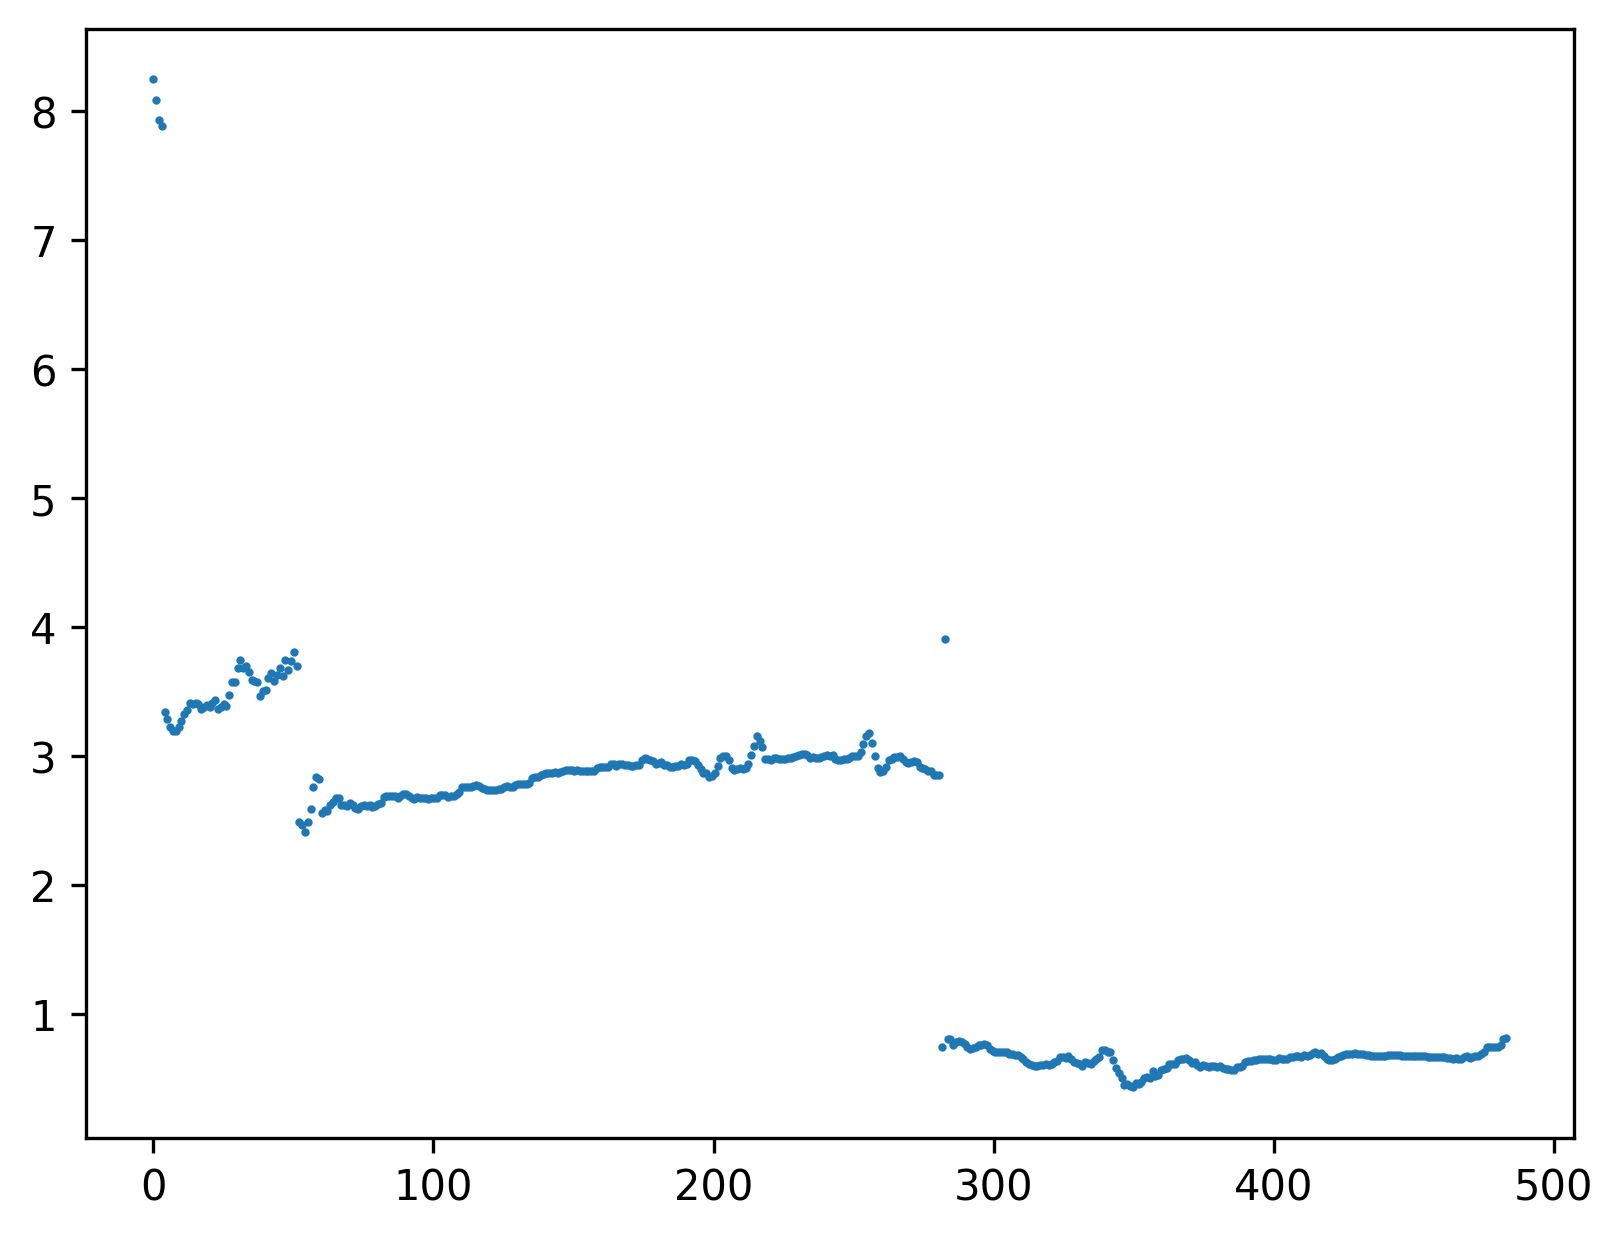

In [20]:
gt = np.array([gt_n, gt_e])
april_ne = april[:, :2]
err = np.linalg.norm(gt - april_ne, axis=1)
plt.figure(dpi=300)
plt.scatter(np.linspace(0, len(err), len(err)), err, s = 1, label='Error')

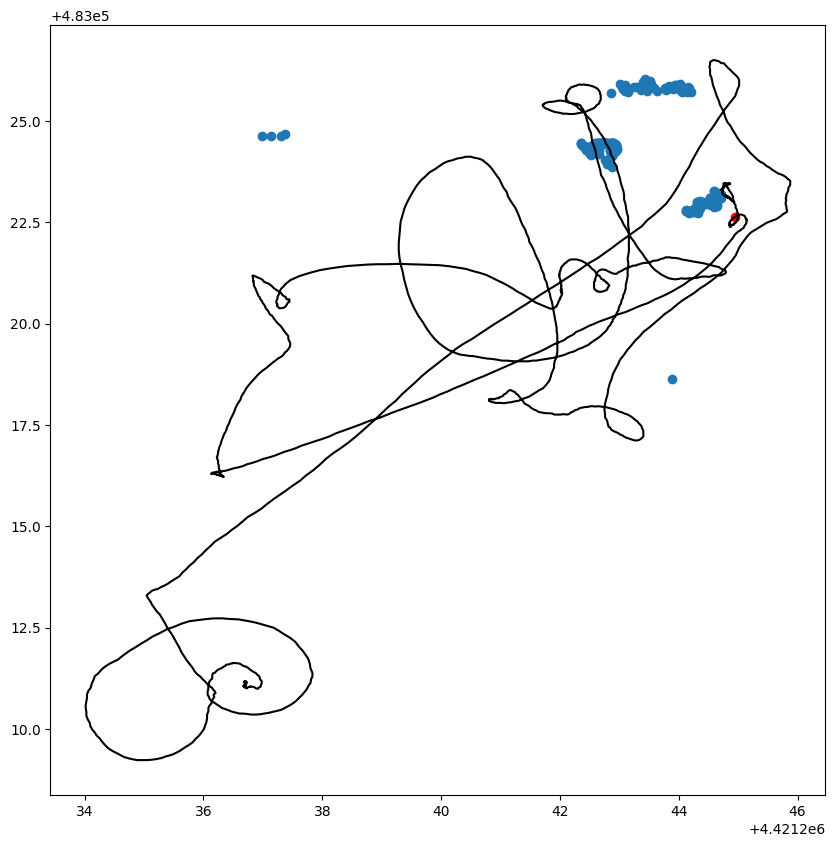

In [32]:
xyz = []

for msg in gps_fixed_msgs:
    lon, lat = msg.longitude, msg.latitude
    _, easting, northing = LLtoUTM(23, lat, lon)
    # xyz.append(
    #     [msg.longitude, msg.latitude, msg.altitude]
    # )
    xyz.append(
        [easting, northing, msg.altitude]
    )
    

xyz = np.array(xyz)



plt.figure(figsize=(10, 10))
plt.plot(xyz[:, 1], xyz[:, 0], c='k')
plt.scatter(april[:, 0], april[:, 1])
# plt.xlim(xyz[:, 0].min(), xyz[:, 0].max())
# plt.ylim(xyz[:, 1].min(), xyz[:, 1].max())
# plt.xlim(-75.1995, -75.1980)
# plt.ylim(39.9408, 39.94125)
plt.scatter(gt_n, gt_e, label='Ground Truth', color='red')

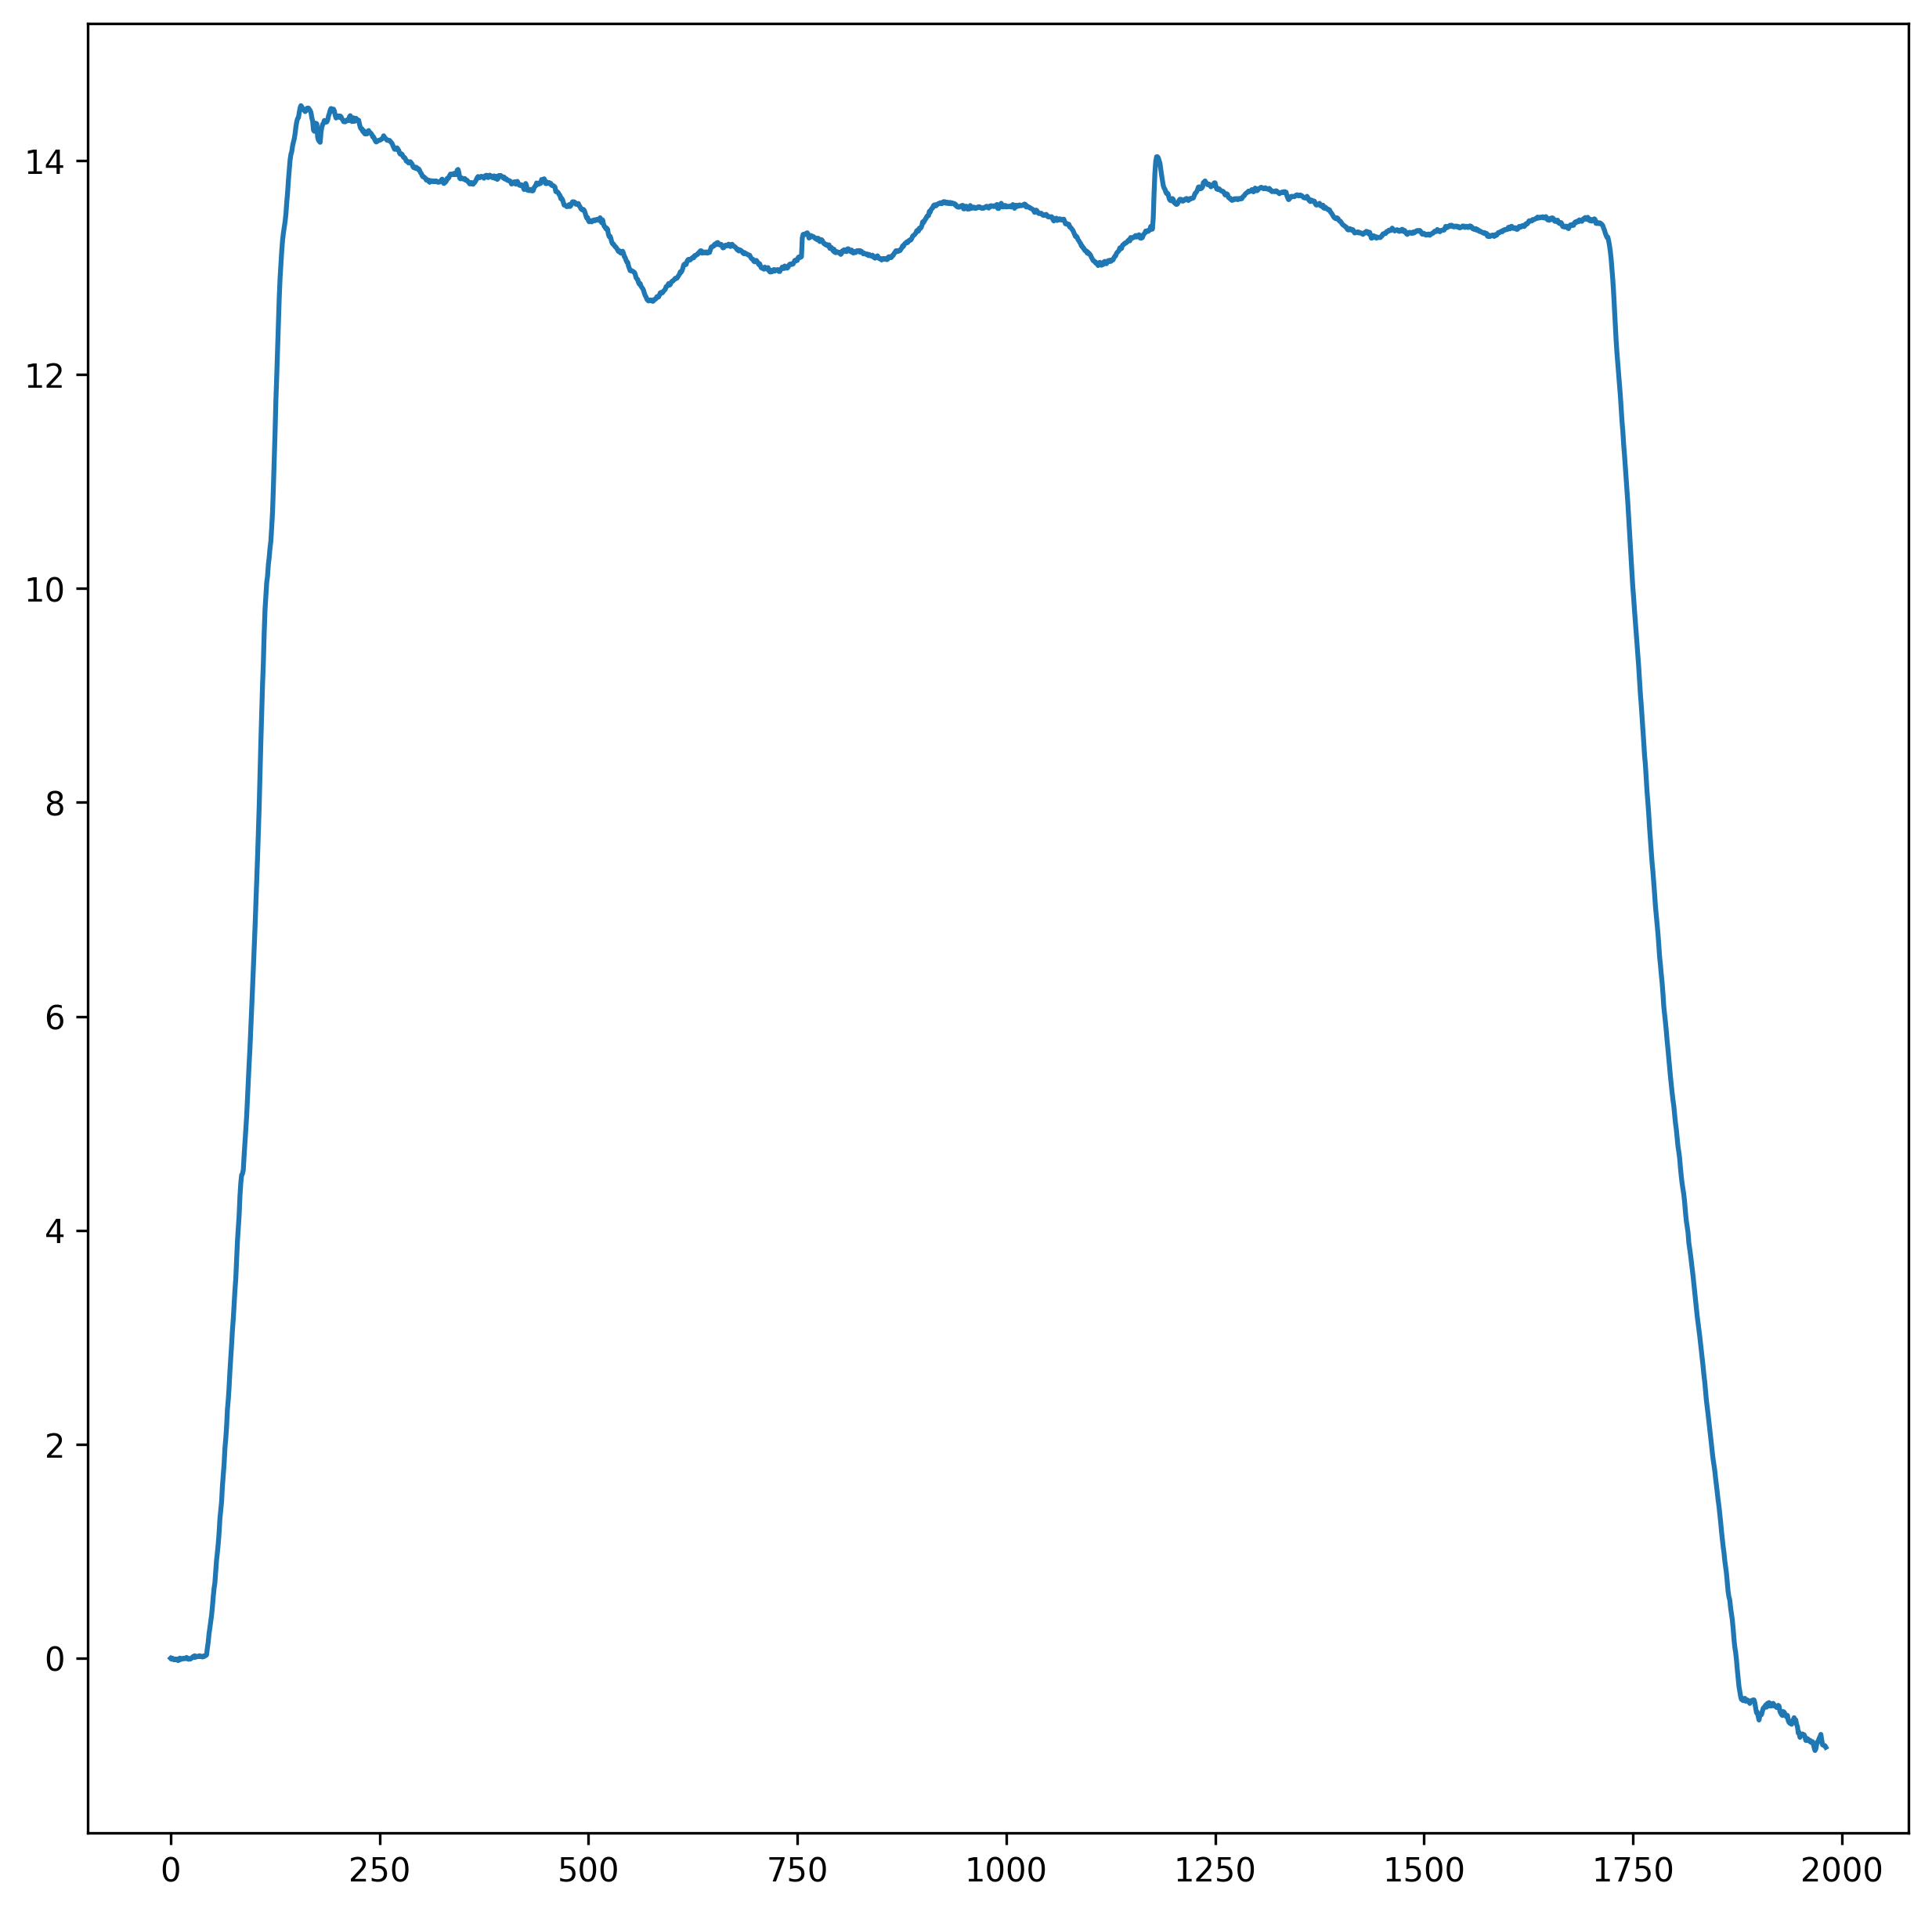

In [13]:
plt.figure(plt.figure(figsize=(10, 10), dpi =300))
plt.plot(xyz[:, 2])